# Problem with collinearity and multicollinearity

Recall the formula for multiple linear regression:

$y = w_0 + w_1x_1 + w_2x_2$

One important assumption of linear regression is that there should exist a linear relationship between each of the predictors (x₁, x₂, etc) and the outcome y. However, **if there is a correlation between the predictors (e.g. x₁ and x₂ are highly correlated), you can no longer determine the effect of one while holding the other constant since the two predictors change together.** The end result is that the coefficients (w₁ and w₂) are now less exact and hence less interpretable.

# Fixing Multicollinearity

When training a machine learning model, it is important that during the data preprocessing stage you sieve out the features in your dataset that exhibit multicollinearity. You can do so using a method known as **VIF — Variance Inflation Factor**.

**VIF** allows you to determine the strength of the correlation between the various independent variables. *It is calculated by taking a variable and regressing it against every other variables.*

VIF calculates how much the variance of a coefficient is inflated because of its linear dependencies with other predictors. Hence its name.

$VIF = 1 / (1 - R^2)$, where $(1 - R^2)$ is known as the **tolerance**

- A large VIF indicates that this feature exhibits multicollinearity with the other features.
- A small VIF indicates that this feature exhibits low multicollinearity with the other features.

# Implementing VIF using Python

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
def calculate_vif(df, features):
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1 / (tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({"VIF": vif, "Tolerance": tolerance})

# Let's Try It Out

To see VIF in action, let’s use a sample dataset named **bloodpressure.csv**:

The dataset consists of the following fields:

- Blood pressure (BP), in mm Hg
- Age, in years
- Weight, in kg
- Body surface area (BSA), in m²
- Duration of hypertension (Dur), in years
- Basal Pulse (Pulse), in beats per minute
- Stress index (Stress)

In [3]:
df = pd.read_csv("data/bloodpressure.csv")
df = df.drop(["Pt", "Unnamed: 8"], axis=1)
df

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


# Visualizing the relationships between columns

In [4]:
import seaborn as sns

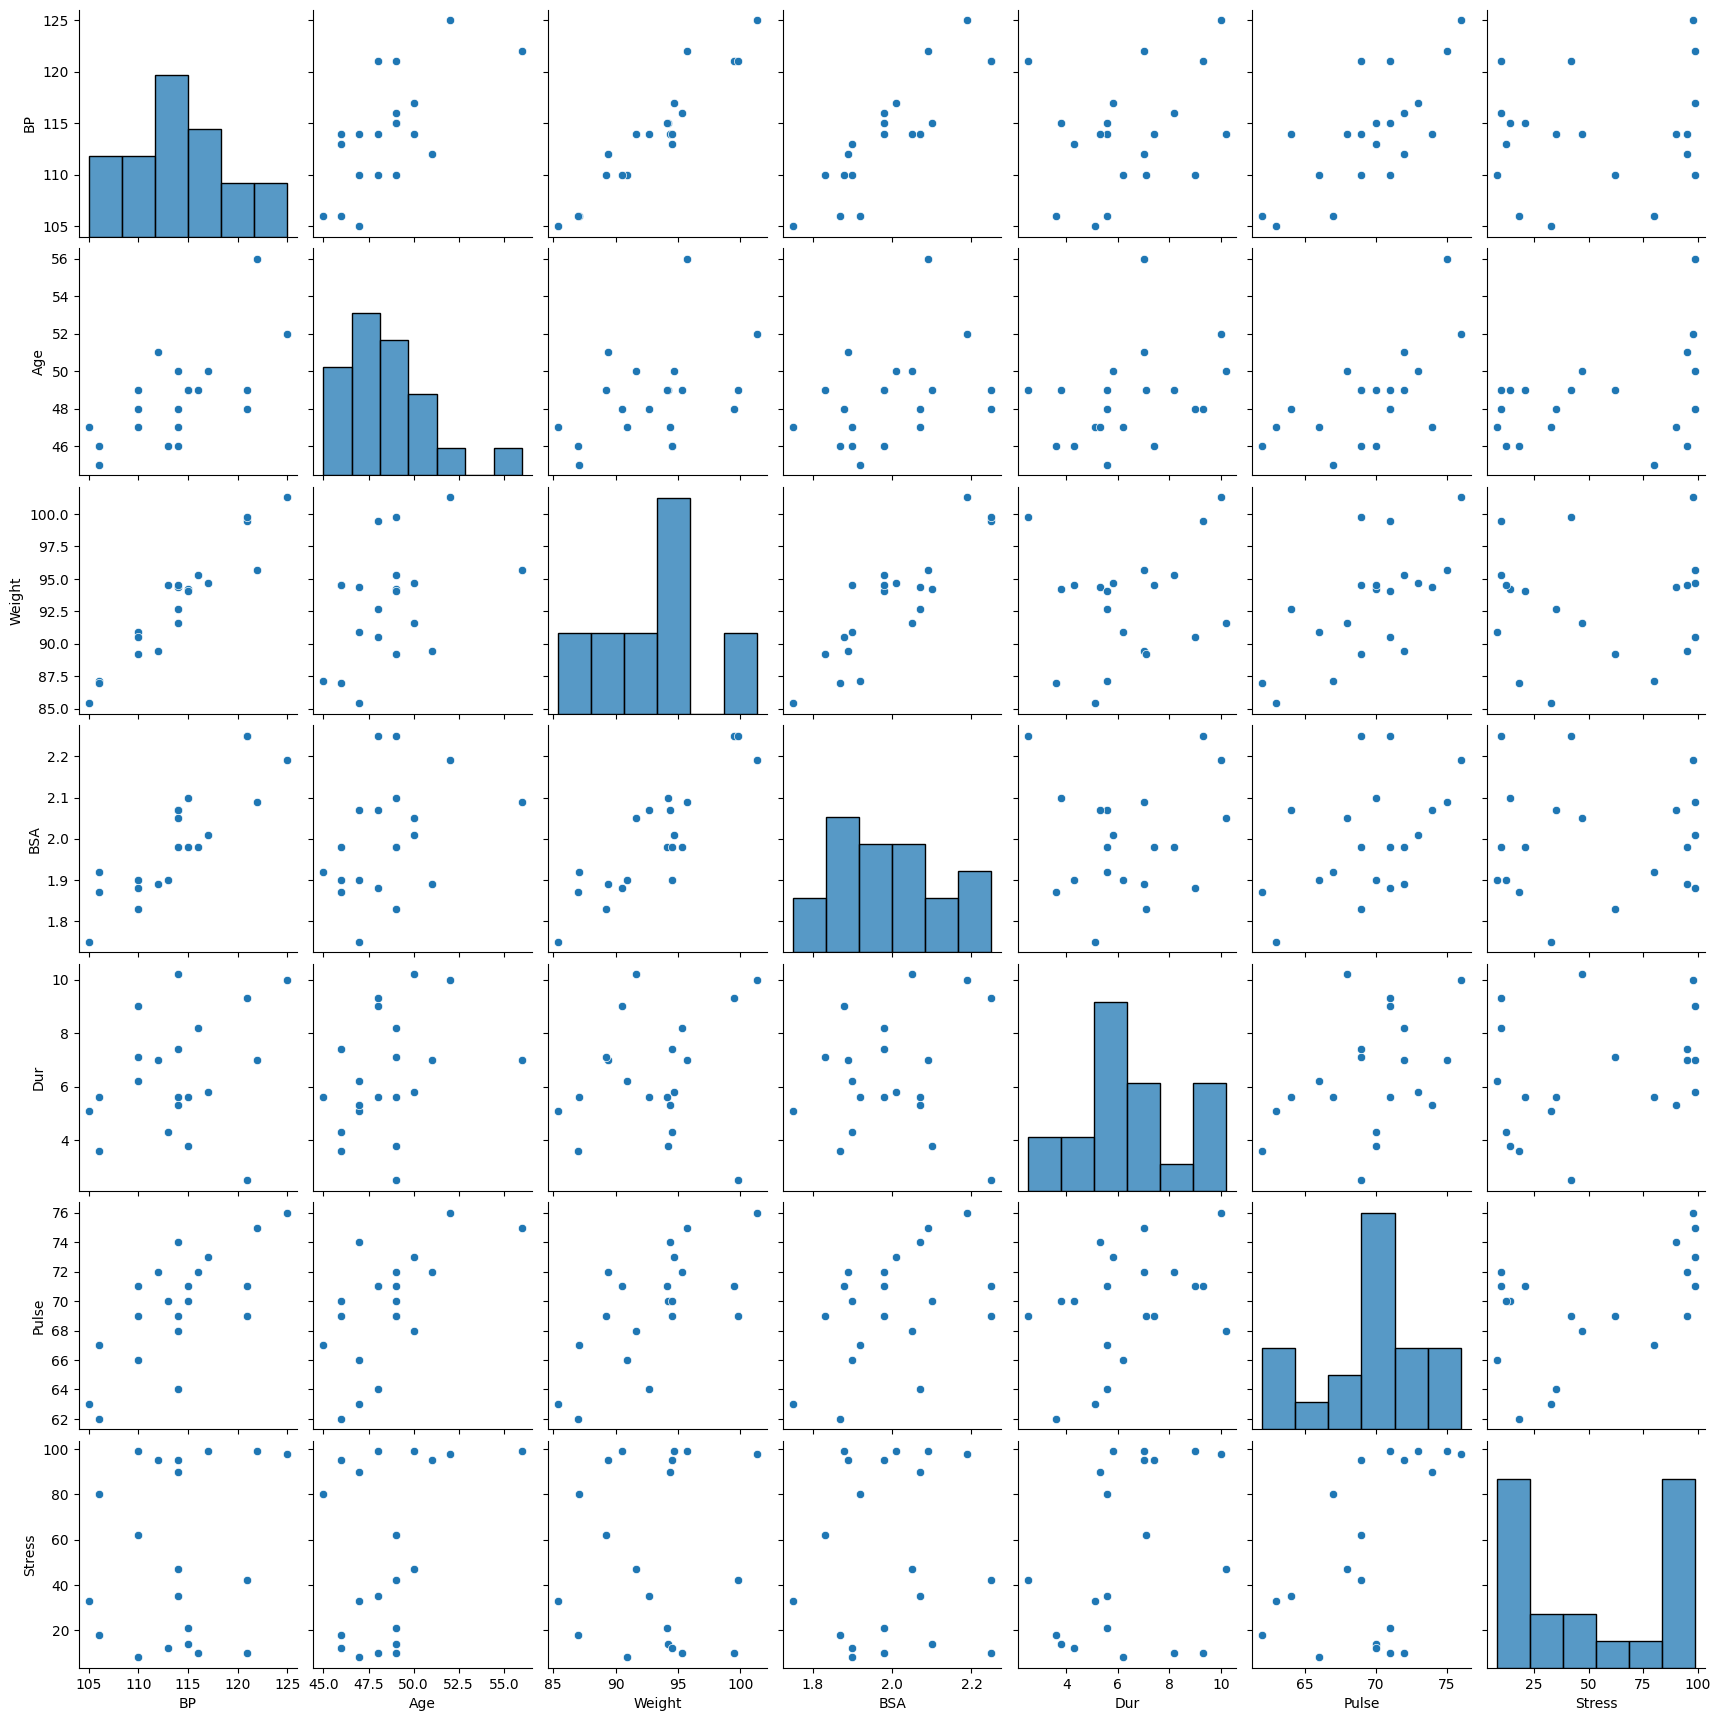

In [5]:
sns.pairplot(df)

# Calculating Correlation

In [6]:
df.corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


Assuming that you are trying to build a model that predicts `BP`, you could see that the top features that correlates to `BP` are `Age`, `Weight`, `BSA`, and `Pulse`:

# Calculating VIF

Now that you have identified the columns that you want to use for training your model, you need to see which of the columns have multicollinearity. So let’s use our `calculate_vif()` function that we have written earlier:

In [7]:
calculate_vif(df=df, features=["Age", "Weight", "BSA", "Pulse"])

,VIF,Tolerance
Age,1.731378,0.577575
Weight,6.885801,0.145226
BSA,5.051235,0.197971
Pulse,2.817197,0.354963


# Interpreting VIF Values

The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:

- 1 — features are not correlated
- 1<VIF<5 — features are moderately correlated
- VIF>5 — features are highly correlated
- VIF>10 — high correlation between features and is cause for concern

From the result calculating the VIF in the previous section, you can see the `Weight` and `BSA` have VIF values greater than 5. This means that `Weight` and `BSA` are highly correlated. This is not surprising as heavier people have a larger body surface area.

So the next thing to do would be to try removing one of the highly correlated features and see if the result for VIF improves. Let’s try removing `Weight` since it has a higher VIF:

In [8]:
calculate_vif(df=df, features=["Age", "BSA", "Pulse"])

,VIF,Tolerance
Age,1.648521,0.606604
BSA,1.297738,0.770572
Pulse,1.801669,0.555041


Let’s now remove `BSA` and see the VIF of the other features:

In [9]:
calculate_vif(df=df, features=["Age", "Weight", "Pulse"])

,VIF,Tolerance
Age,1.620404,0.617130
Weight,1.769065,0.565270
Pulse,2.390933,0.418247


As you observed, removing `Weight` results in a lower VIF for all other features, compared to removing `BSA`. So should you remove `Weight` then? Well, ideally, yes. But for practical reasons, it would make more sense to remove `BSA` and keep `Weight`. **This is because later on when the model is trained and you use it for prediction, it is easier to get a patient’s weight than his/her body surface area.**

# One More Example

Let’s look at one more example. This time you will use the Breast Cancer dataset that comes with sklearn:

In [10]:
from sklearn import datasets

In [11]:
bc = datasets.load_breast_cancer()
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


This dataset has 30 columns, so let’s only focus on the first 8 columns:

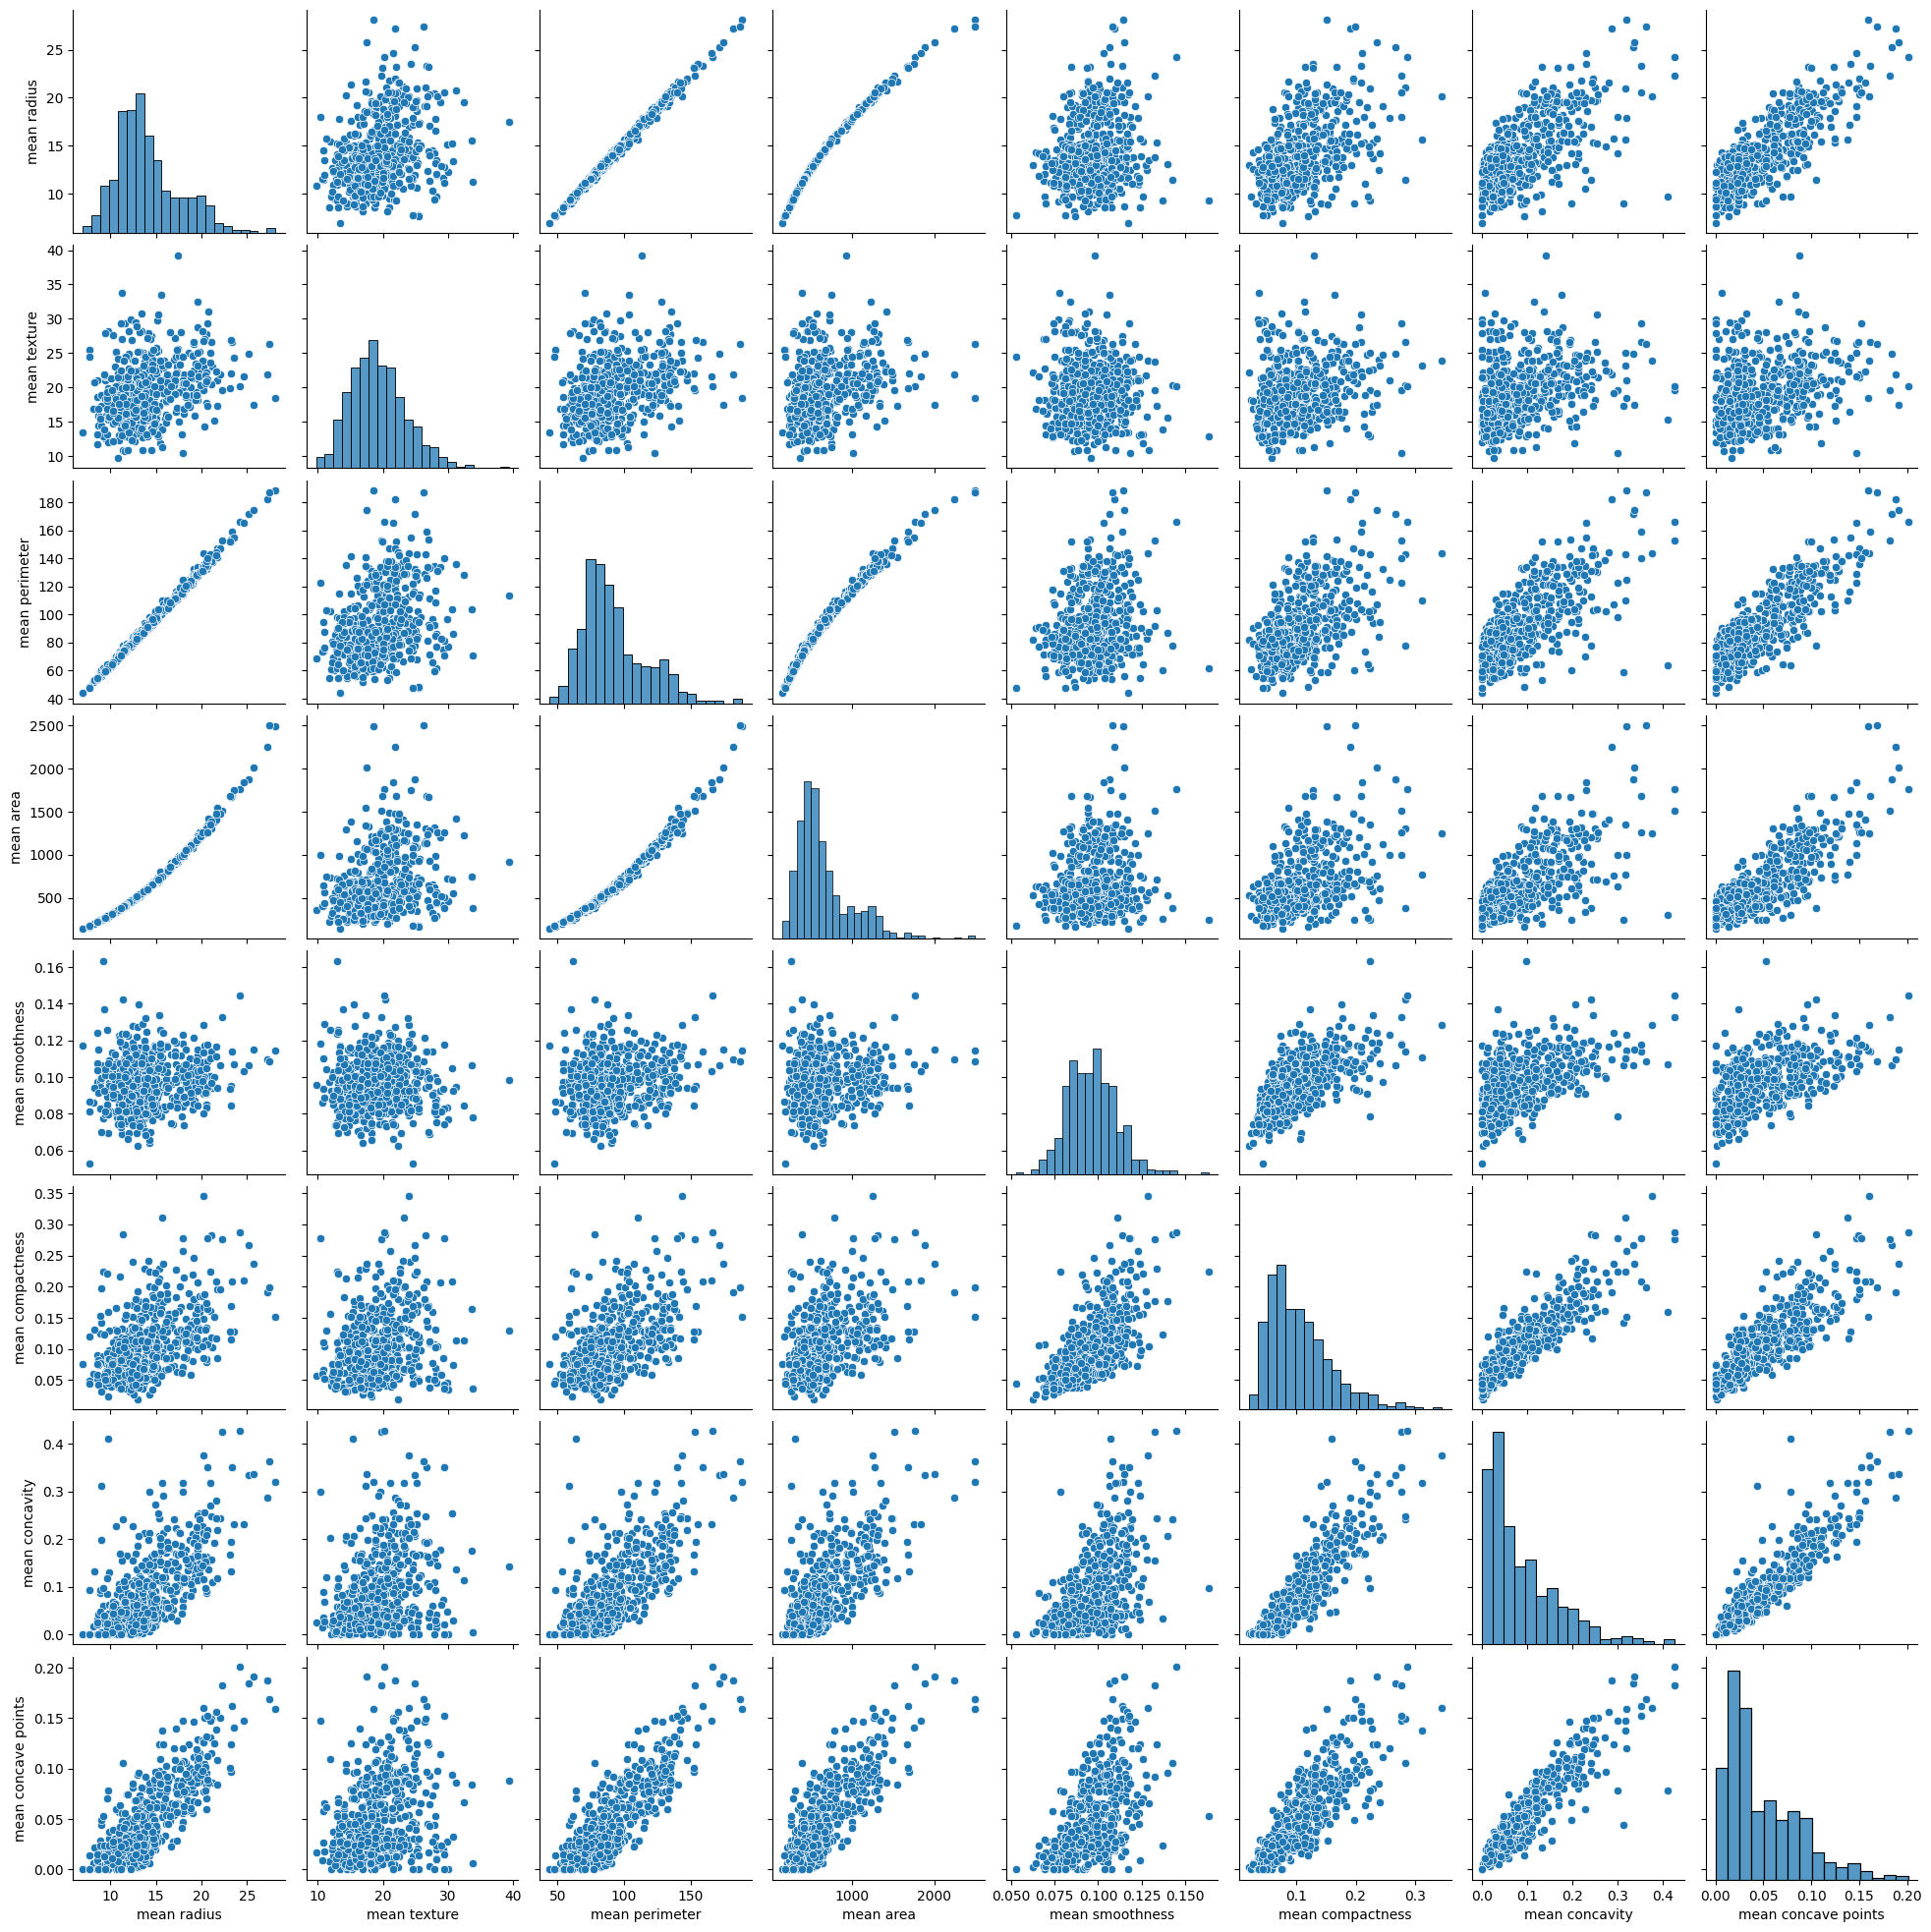

In [12]:
sns.pairplot(df.iloc[:, :8])

You can immediately observe that some features are highly correlated. Can you spot them?

Let’s calculate the VIF for the first 8 columns:

In [13]:
calculate_vif(df=df, features=df.columns[:8])

,VIF,Tolerance
mean radius,1585.773291,0.000631
mean texture,1.178570,0.848486
mean perimeter,1863.639493,0.000537
mean area,48.149093,0.020769
mean smoothness,2.799647,0.357188
mean compactness,14.323801,0.069814
mean concavity,11.575531,0.086389
mean concave points,21.423621,0.046677


You can see that `mean radius`, `mean perimeter`, `mean area`, `mean compactness`, `mean concavity`, and `mean concave points` have large VIF values

Let’s try to remove these features one by one and observe their new VIF values. First, remove `mean perimeter`:

In [14]:
calculate_vif(
    df=df,
    features=[
        "mean radius",
        "mean texture",
        "mean area",
        "mean smoothness",
        "mean compactness",
        "mean concavity",
        "mean concave points",
    ],
)

,VIF,Tolerance
mean radius,45.224215,0.022112
mean texture,1.178563,0.848491
mean area,44.462573,0.022491
mean smoothness,2.696673,0.370827
mean compactness,6.953641,0.143810
mean concavity,11.330855,0.088255
mean concave points,21.310338,0.046926


Immediately there is a reduction of VIFs across the board. Let’s now remove `mean area`:

In [15]:
calculate_vif(
    df=df,
    features=[
        "mean radius",
        "mean texture",
        # "mean area",
        "mean smoothness",
        "mean compactness",
        "mean concavity",
        "mean concave points",
    ],
)

,VIF,Tolerance
mean radius,6.322641,0.158162
mean texture,1.178548,0.848501
mean smoothness,2.689197,0.371858
mean compactness,6.382809,0.156671
mean concavity,10.805535,0.092545
mean concave points,21.237161,0.047087


Let’s now remove the `mean concave points`, which has the highest VIF:

In [16]:
calculate_vif(
    df=df,
    features=[
        "mean radius",
        "mean texture",
        # "mean area",
        "mean smoothness",
        "mean compactness",
        "mean concavity",
        # "mean concave points",
    ],
)

,VIF,Tolerance
mean radius,2.089964,0.478477
mean texture,1.178458,0.848567
mean smoothness,1.963786,0.509221
mean compactness,6.177925,0.161867
mean concavity,6.755990,0.148017


Finally, let’s remove `mean concavity`:

In [17]:
calculate_vif(
    df=df,
    features=[
        "mean radius",
        "mean texture",
        # "mean area",
        "mean smoothness",
        "mean compactness",
        # "mean concavity",
        # "mean concave points",
    ],
)

,VIF,Tolerance
mean radius,1.490951,0.670713
mean texture,1.171249,0.853789
mean smoothness,1.963099,0.509399
mean compactness,2.564557,0.389931


And now all the VIF values are under 5.

# Summary

In this article, you learned about the difference between correlation, collinearity, and multicollinearity. In particular, you learned that multicollinearity happens when a feature exhibits a linear relationship with two or more features. To detect multicollinearity, one method is to calculate the **Variance Inflation Factor (VIF).** Any feature that has a VIF more than 5 should be removed from your training dataset.

**It is important to note that VIF only works on continuous variables, and not categorical variables.**